In [162]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import random
import math

In [163]:
num_samples=200 ## amount of samples
num_centroids=3 ## amount of clusters to choose
## run all after choosing

In [164]:
random_centroids=[]
random_centroids.append(np.random.randint(0,100,(num_samples,2))) ## the array of random points X,Y

In [165]:
df=pd.DataFrame(random_centroids[0],columns=["X","Y"])

In [166]:
display(df)

,X,Y
0,69,9
1,77,54
2,44,14
3,31,86
4,39,57
...,...,...
195,68,78
196,23,86
197,75,51
198,57,3


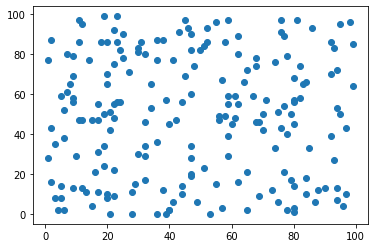

In [167]:
plt.scatter(x=df['X'],y=df['Y'])

In [168]:
def fit_transform_by_std(df):
    std=pd.DataFrame(index=df.columns,columns=["std","mean"])
    for i in df.columns:
        std['std'][i]=math.sqrt(sum((df[i]-df[i].mean())*(df[i]-df[i].mean()))/len(df[i]))
        std['mean'][i]=df[i].mean()
    for i in df.columns:
        df[i]=(df[i]-std['mean'][i])/std['std'][i]
    return df

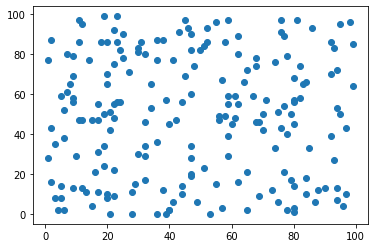

In [169]:
plt.scatter(x=df['X'],y=df['Y'])

In [170]:
def check_distance(df,centroid_df):
    distance_calc=pd.DataFrame(columns=centroid_df.index,index=df.index)
    for col in distance_calc.columns:
        distance_calc[col].values[:] = 0
    distance=0
    for index_1 in df.index:
        for index in centroid_df.index:
            distance=0
            for col in centroid_df.columns:
                distance+=pow(df[col][index_1]-centroid_df[col][index],2)
                distance_calc[index][index_1]=math.sqrt(distance)## checking distance using euclidian formula
    list1=[]
    i=0
    for index in distance_calc.index:
        for col in distance_calc.columns:
            minimum=min(distance_calc.iloc[index])
            if distance_calc[col][index]==minimum:
                if(len(list1)==index):
                    list1.append(col)
    df['center']=list1
    list1=[]
    return df

In [171]:
def average_clusters(df,centroid_df):
    new_centr=pd.DataFrame(columns=centroid_df.columns,index=centroid_df.index)
    for col in new_centr.columns:
        for center in new_centr.index:
            new_centr[col][center]=df[df['center']==center][col].mean()
    return new_centr

In [172]:
def kmeans(X, num_clusters, num_iterations):
    random_centroids=[]
    random_centroids.append(np.random.randint(0,100,(num_clusters,2)))
    list2=[]
    for i in range(0,num_centroids):
        list2.append('Centr'+np.str(i))
    centroid_df=pd.DataFrame(index=list2,data=random_centroids[0],columns=['X','Y'])  
    
    ## fitting by STD, optional
    X=fit_transform_by_std(X)
    centroid_df=fit_transform_by_std(centroid_df)
    
    
    for k in range(num_iterations):
        df=check_distance(X,centroid_df)
        centroid_df=average_clusters(X,centroid_df)
    return X,centroid_df

In [173]:
df,centroids=kmeans(df,num_centroids,10)

In [174]:
display(df,centroids)

,X,Y,center
0,0.764675,-1.312176,Centr1
1,1.043436,0.175177,Centr1
2,-0.106452,-1.146915,Centr1
3,-0.559438,1.232851,Centr0
4,-0.280677,0.274334,Centr0
...,...,...,...
195,0.729830,0.968432,Centr0
196,-0.838198,1.232851,Centr0
197,0.973745,0.076020,Centr1
198,0.346534,-1.510490,Centr1


,X,Y
Centr0,0.216969,1.039192
Centr1,0.821298,-0.739442
Centr2,-1.04566,-0.407052


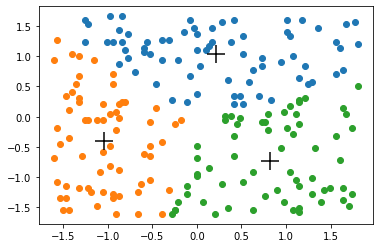

In [175]:
plt.figure()
for center in df['center'].value_counts().index:
    plt.scatter(x=df[df['center']==center]['X'],y=df[df['center']==center]['Y'])
    plt.scatter(x=centroids['X'][center],y=centroids['Y'][center],color='black',marker='+',s=300)
plt.show()